In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Define the stock tickers (including NIFTY 50)
tickers = ["ITC.NS", "IRCTC.NS", "BANDHANBNK.NS", "ZOMATO.NS", "^NSEI"]  # ^NSEI represents NIFTY 50

In [3]:
# Fetch data for the last 5 years
stock_data = {}
for ticker in tickers:
    stock = yf.download(ticker, start="2019-01-01", end="2024-01-01")
    stock_data[ticker] = stock

C:\Users\Admin\AppData\Local\Temp\ipykernel_18404\1837702181.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(ticker, start="2019-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed
C:\Users\Admin\AppData\Local\Temp\ipykernel_18404\1837702181.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(ticker, start="2019-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed
C:\Users\Admin\AppData\Local\Temp\ipykernel_18404\1837702181.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(ticker, start="2019-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed
C:\Users\Admin\AppData\Local\Temp\ipykernel_18404\1837702181.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock =

In [4]:
# Convert to DataFrame and save as CSV
for ticker in tickers:
    stock_data[ticker].to_csv(f"{ticker}_data.csv")

print("Stock data downloaded and saved!")

Stock data downloaded and saved!


In [5]:
df = pd.read_csv("collected_data.csv")  # Replace with the correct file path
if df is not None:
    df = df.fillna(0)  # Fill missing values with 0
    
    for col in df.select_dtypes(include=['float64']):  # Convert only float columns
        df[col] = df[col].astype(int)

    print("✅ Data preprocessing completed!")
else:
    print("❌ Skipping data preprocessing since df is not available.")

✅ Data preprocessing completed!


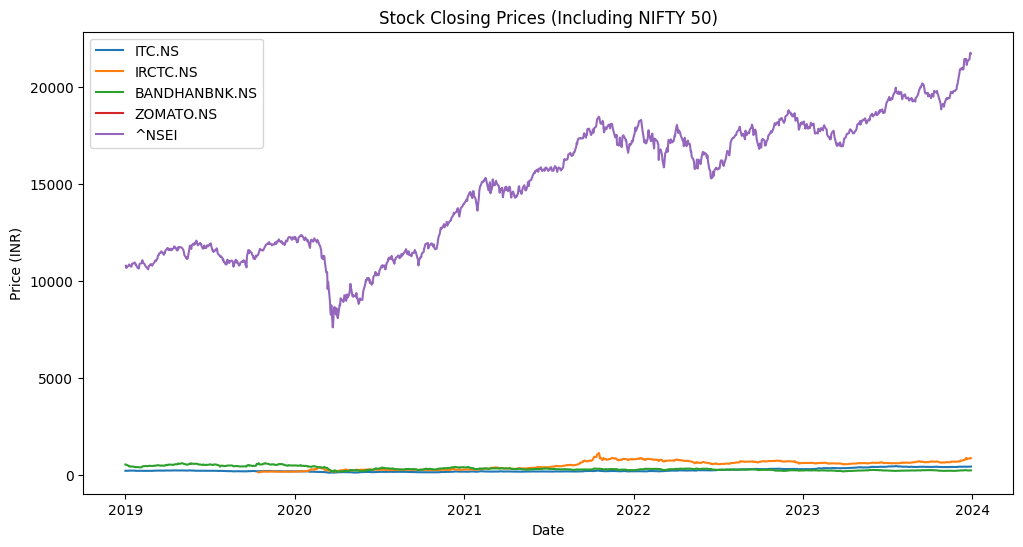

In [6]:
column_list = ['Date', 'Close', 'High', 'Low', 'Open' , 'Volume']
# Plot closing prices
plt.figure(figsize=(12, 6))
for ticker in tickers:
    df = pd.read_csv(f"{ticker}_data.csv", skiprows=3, parse_dates=True, header=None, names=column_list)
    for col in df.select_dtypes(include=['float64']):  # Convert only float columns
        df[col] = df[col].astype(int)

    df["Date"] = pd.to_datetime(df["Date"])
    plt.plot(df["Date"], df["Close"], label=ticker)

plt.legend()
plt.title("Stock Closing Prices (Including NIFTY 50)")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.show()

In [7]:
df.to_csv("collected_data.csv", index=False)  # Saves data as a CSV file
